# Analysis of wind and solar energy data

## Reading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import numpy as np
import seaborn as sns
from datetime import datetime

#import only second sheet
df = pd.read_excel('new_format-2020 (3).xlsx', sheet_name='SupIm')
df['date'] = pd.date_range(start='1/1/2020', periods=len(df), freq='H')
df = df.set_index('date')

#view DataFrame: all the data
#print(df)

#view DataFrame head: some elements of the data
#print(df.head)
#print(list(df))

#view columns
#print(df.columns)

In [56]:
# plot constants
wind_color = 'orange'
solar_color= 'yellow'
wind_solar_color= 'maroon'
demand_color= 'blue'
solar_label = 'Solar irradiation ($kJ/m^2$)'
wind_label = 'Wind speed ($m/s$)'
energy_label = 'Energy ($KWh$)'
solar_energy_label = 'Solar'
wind_energy_label = 'Wind'
demand_energy_label = 'Demand'
wind_solar_energy_label = 'Wind + Solar'
data_year = 2020

# column names
label = ['South West', 'South East', 'Greater London']
wind_column = ['SouthWest.Wind (m/s)','SouthEast.Wind (m/s)','GreaterLondon.Wind (m/s)']
solar_column = ['SouthWest.Solar (kJ/m2)','SouthEast.Solar (kJ/m2)','GreaterLondon.Solar (kJ/m2)']
wind_column_energy = ['SouthWest.Wind (MWh)','SouthEast.Wind (MWh)','GreaterLondon.Wind (MWh)']
solar_column_energy = ['SouthWest.Solar (MWh)','SouthEast.Solar (MWh)','GreaterLondon.Solar (MWh)']
demand_column_energy = ['SouthWest.Demand (MWh)','SouthEast.Demand (MWh)','GreaterLondon.Demand (MWh)']

## Directly plot the wind data & solar data

Text(0.5, 0.98, 'Hourly wind speed and solar irradiation')

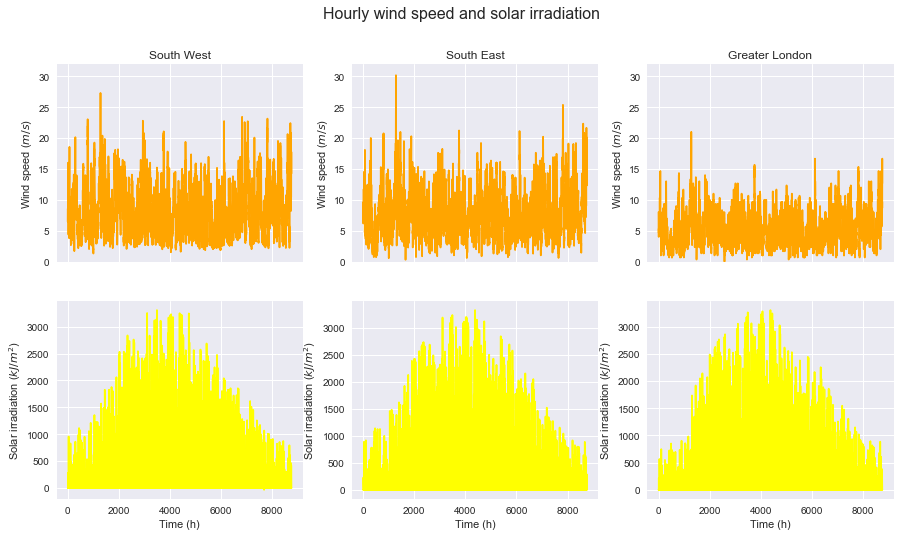

In [57]:
mpl.style.use('seaborn')
#Plot daily average
fig,ax =  plt.subplots(2,3,figsize=(15,8), sharex=True)
#x_ticks = pd.date_range(start='01/01/2020', end='12/31/2020', freq='3MS')
for i in [0,1,2]:
    axx = ax[0][i]
    x = df['t']
    y = df[wind_column[i]]
    axx.plot(x, y,label=label[i],color=wind_color)
    axx.set_ylabel(wind_label)
    axx.set_ylim(0,32)
    axx.title.set_text(label[i])
for i in [0,1,2]:
    axx = ax[1][i]
    x = df['t']
    y = df[solar_column[i]]
    axx.plot(x,y,label=label[i],color=solar_color)
    axx.set_ylabel(solar_label)
    axx.set_xlabel('Time (h)')
fig.suptitle('Hourly wind speed and solar irradiation', fontsize=16) 

## Resample and plot daily average

Text(0.5, 0.98, 'Daily average of wind speed and solar irradiation')

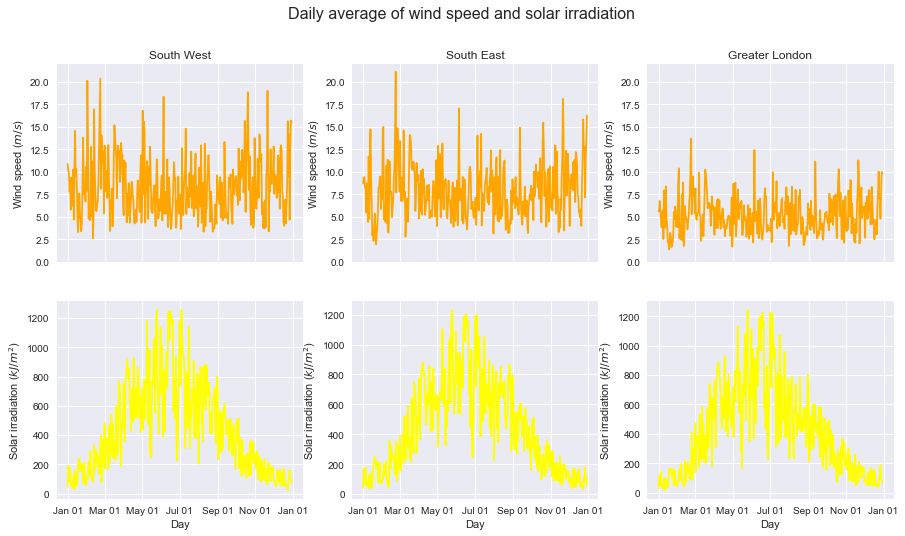

In [58]:
dfd = df.resample('D').mean()
fig,ax =  plt.subplots(2,3,figsize=(15,8), sharex=True)
#x_ticks = pd.date_range(start='01/01/2020', end='12/31/2020', freq='3MS')
for i in [0,1,2]:
    axx = ax[0][i]
    axx.plot(dfd[wind_column[i]],label=label[i],color=wind_color)
    axx.set_ylabel(wind_label)
    axx.set_ylim(0,22)
    axx.title.set_text(label[i])
    axx.xaxis.set_major_formatter(mdates.DateFormatter("%h %d"))
for i in [0,1,2]:
    axx = ax[1][i]
    axx.plot(dfd[solar_column[i]],label=label[i],color=solar_color)
    axx.set_ylabel(solar_label)
    axx.set_xlabel('Day')
    axx.xaxis.set_major_formatter(mdates.DateFormatter("%h %d"))
fig.suptitle('Daily average of wind speed and solar irradiation', fontsize=16)

## Hourly distribution

### Computing hourly distribution
_**Not needed as seaborn does the mean automatically**_

In [42]:
#dfh = df.groupby(df.index.hour).mean()
#dfh_std = df.groupby(df.index.hour).std()

### Plotting hourly distributions

Text(0.5, 0.98, 'Hourly distributions of wind speed and solar irradiation')

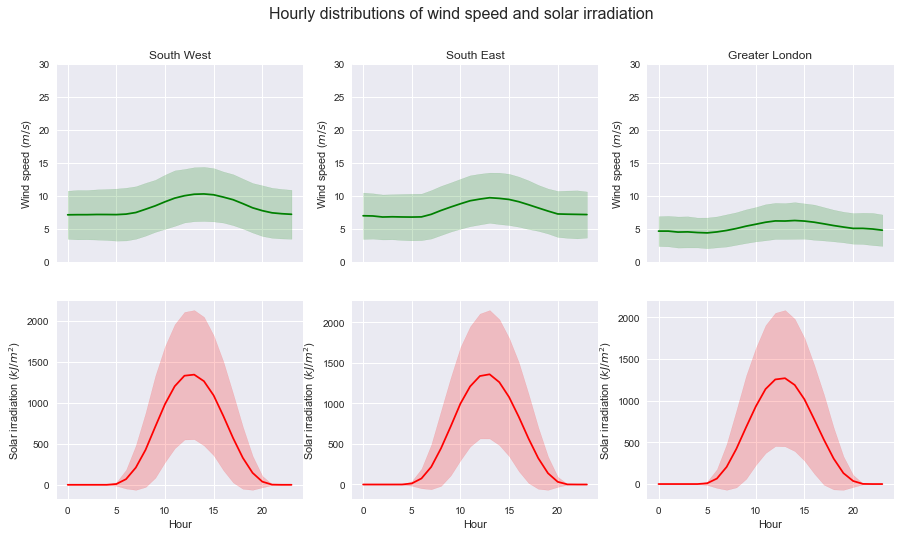

In [43]:
#create figure, and axes
mpl.style.use('seaborn')
fig,ax =  plt.subplots(2,3,figsize=(15,8), sharex=True)

for i in [0,1,2]:
    y=df[wind_column[i]]
    x=df.index.hour
    ax[0][i].set_ylabel(wind_label)
    ax[0][i].set_ylim(0,30)
    sns.lineplot(ax=ax[0][i], x=x, y=y,ci='sd',color=wind_color) #shade mean±std
    #ax[0][i].scatter(x=x, y=y, marker='.',color=wind_color)
    ax[0][i].title.set_text(label[i])
for i in [0,1,2]:
    y=df[solar_column[i]]
    x=df.index.hour
    ax[1][i].set_ylabel(solar_label)
    ax[1][i].set_xlabel('Hour')
    sns.lineplot(ax=ax[1][i], x=x, y=y,ci='sd',color=solar_color)
    #ax[1][i].scatter(x=x, y=y, marker='.',color=solar_color)
fig.suptitle('Hourly distributions of wind speed and solar irradiation', fontsize=16) 

# Analysis of wind and solar energy processed data

In [44]:
df_proc = pd.DataFrame({'date':pd.date_range(start='1/1/2020', periods=8760, freq='H')})
# put wind & solar data from each sheet into the dataframe df_proc
for i in [0,1,2]:
    df_proc_sheet = pd.read_excel('3 regions-post processing.xlsx', sheet_name=label[i])
    df_proc[wind_column_energy[i]] = df_proc_sheet['Wind MWh']
    df_proc[solar_column_energy[i]] = df_proc_sheet['Solar MWh']
    df_proc[demand_column_energy[i]] = df_proc_sheet['Demand MWh']
df_proc = df_proc.set_index('date')

In [45]:
df_proc_h = df_proc.groupby(df.index.hour).mean()
df_proc_h_std = df.groupby(df.index.hour).std()
df_proc_h

,SouthWest.Wind (MWh),SouthWest.Solar (MWh),SouthWest.Demand (MWh),SouthEast.Wind (MWh),SouthEast.Solar (MWh),SouthEast.Demand (MWh),GreaterLondon.Wind (MWh),GreaterLondon.Solar (MWh),GreaterLondon.Demand (MWh)
date,,,,,,,,,
0,1191.483851,0.000000,2267.061459,1489.008492,0.000000,3623.763031,657.516826,0.000000,1652.354539
1,1198.836931,0.000000,2212.498741,1460.937900,0.000000,3536.547769,674.496851,0.000000,1612.586338
2,1201.069574,0.000000,2205.229590,1398.278879,0.000000,3524.928463,635.003338,0.000000,1607.288195
3,1218.507099,0.000000,2153.726605,1409.440023,0.000000,3442.604001,644.728462,0.000000,1569.750090
4,1218.878368,21.719284,2128.649159,1405.727223,43.095147,3402.519193,587.321072,9.886941,1551.472318
5,1229.343442,180.773466,2126.162065,1418.830463,232.198828,3398.543722,597.569896,189.845734,1549.659593
6,1270.557488,368.191131,2248.197784,1449.635969,432.410059,3593.610568,645.360442,374.774795,1638.605692
7,1345.087540,648.664630,2525.639847,1618.307067,747.723126,4037.085220,730.614475,668.086245,1840.820172
8,1510.068331,1026.642872,2789.850697,1892.995889,1215.271090,4459.410563,835.938664,1068.504191,2033.391041


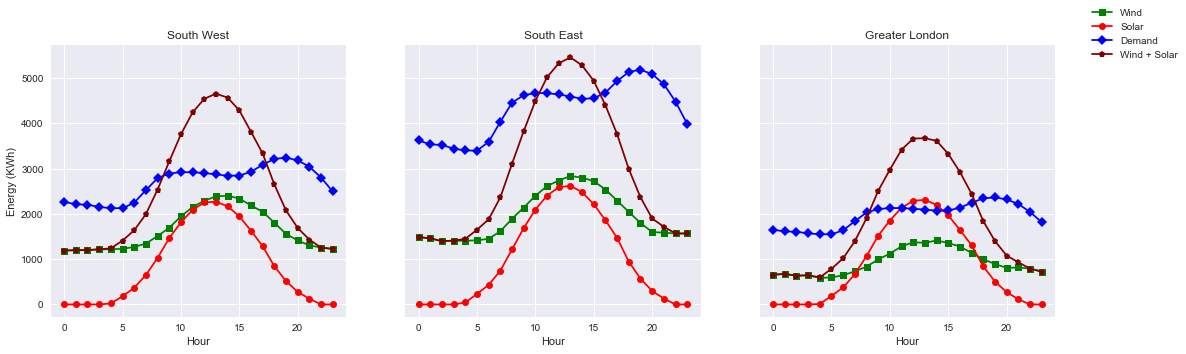

In [46]:
mpl.style.use('seaborn')
#create figure, and axes
fig,ax =  plt.subplots(1,3,figsize=(18,5), sharey=True, sharex=True)

for i in [0,1,2]:
    y=df_proc_h[wind_column_energy[i]]
    x=df_proc_h.index
    ax[i].plot(x,y,'s-',label=wind_energy_label,color=wind_color)
    if i == 0:
        ax[i].set_ylabel('Energy (KWh)')
for i in [0,1,2]:
    y=df_proc_h[solar_column_energy[i]]
    x=df_proc_h.index
    ax[i].plot(x,y,'o-',label=solar_energy_label,color=solar_color)
for i in [0,1,2]:
    y=df_proc_h[demand_column_energy[i]]
    x=df_proc_h.index
    ax[i].plot(x,y,'D-',label=demand_energy_label,color=demand_color)
for i in [0,1,2]:
    y=df_proc_h[wind_column_energy[i]]+df_proc_h[solar_column_energy[i]]
    x=df_proc_h.index
    ax[i].plot(x,y,'p-',label=wind_solar_energy_label,color=wind_solar_color)
    ax[i].title.set_text(label[i])
    ax[i].set_xlabel('Hour')
handles, labels = ax[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

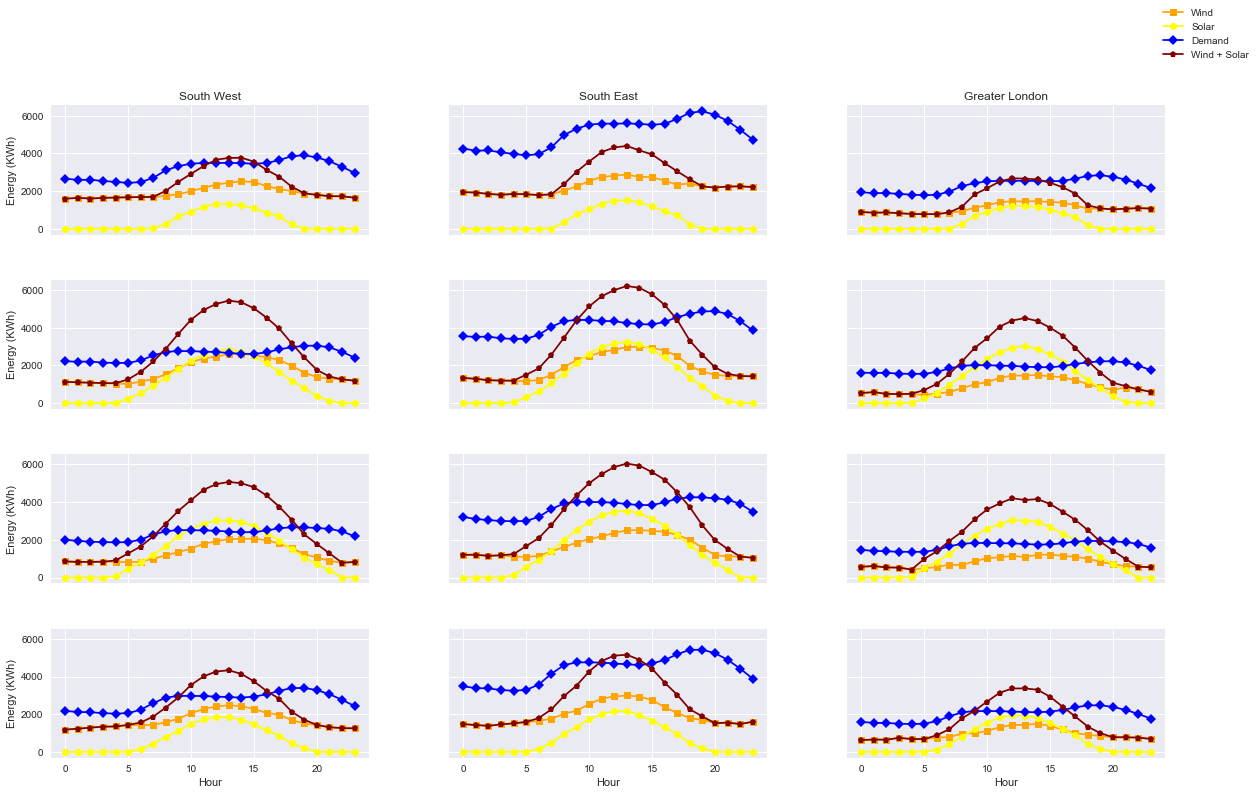

In [95]:
mpl.style.use('seaborn')
#create figure, and axes

#winter is DJF
winter = {'label':'Winter', 'plot_pos':0,
          'period':((df_proc.index >= datetime(2020, 12, 1)) | (df_proc.index < datetime(2020, 3, 1)) )}
spring = {'label':'Spring', 'plot_pos':1,
          'period':((df_proc.index >= datetime(2020, 3, 1)) & (df_proc.index < datetime(2020, 6, 1)))}
summer = {'label':'Summer', 'plot_pos':2,
          'period':((df_proc.index >= datetime(2020, 6, 1)) & (df_proc.index < datetime(2020, 9, 1)) )}
autumn = {'label':'Autumn', 'plot_pos':3,
          'period':((df_proc.index >= datetime(2020, 9, 1)) & (df_proc.index < datetime(2020, 12, 1)))}

fig,ax =  plt.subplots(4,3,figsize=(18,12), sharey=True, sharex=True)
seasons = [summer, winter, autumn, spring]
for season in seasons:
    j = season['plot_pos']
    df_season = df_proc[season['period']]
    df_season_hourly =  df_season.groupby(df_season.index.hour).mean()
    for i in [0,1,2]:
        y=df_season_hourly[wind_column_energy[i]]
        x=df_season_hourly.index
        ax[j][i].plot(x,y,'s-',label=wind_energy_label,color=wind_color)
        if i == 0:
            ax[j][i].set_ylabel('Energy (KWh)')
    for i in [0,1,2]:
        y=df_season_hourly[solar_column_energy[i]]
        x=df_season_hourly.index
        ax[j][i].plot(x,y,'o-',label=solar_energy_label,color=solar_color)
    for i in [0,1,2]:
        y=df_season_hourly[demand_column_energy[i]]
        x=df_season_hourly.index
        ax[j][i].plot(x,y,'D-',label=demand_energy_label,color=demand_color)
    for i in [0,1,2]:
        y=df_season_hourly[wind_column_energy[i]]+df_season_hourly[solar_column_energy[i]]
        x=df_season_hourly.index
        ax[j][i].plot(x,y,'p-',label=wind_solar_energy_label,color=wind_solar_color)
        if j==0:
            ax[j][i].title.set_text(label[i])
        if j==3:
            ax[j][i].set_xlabel('Hour')
handles, labels = ax[j][2].get_legend_handles_labels()
plt.subplots_adjust(left=0.07, right=0.93, wspace=0.25, hspace=0.35)
fig.legend(handles, labels, loc='upper right')

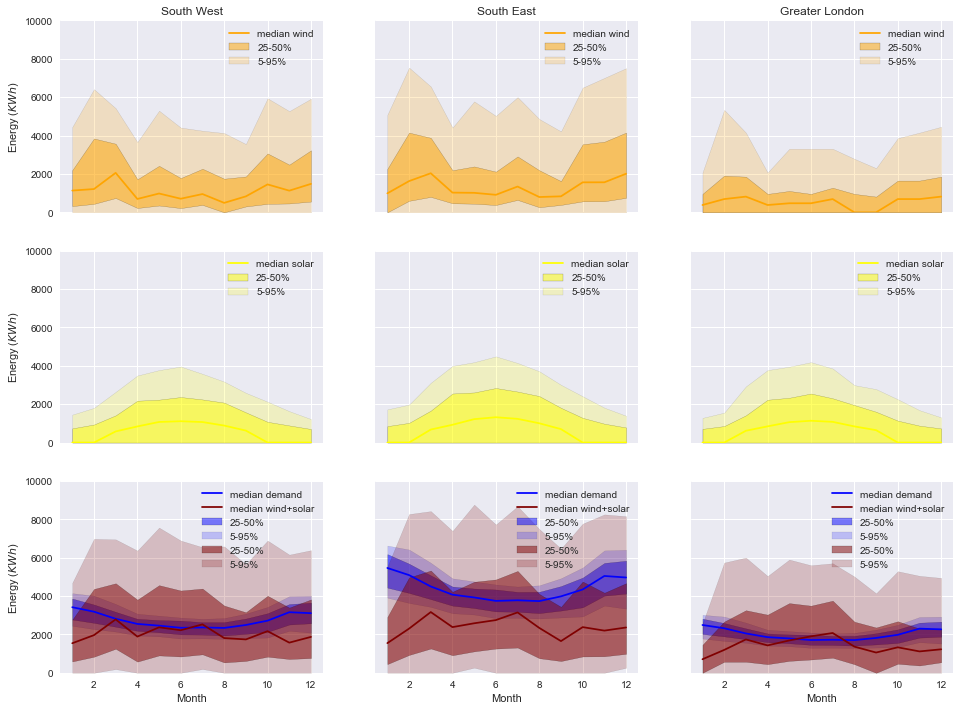

In [151]:
def plot_median_quantiles(y,x,ax,params):
    color, ylim, ylabel, xlabel,legend, (i,j) = params['color'], params['ylim'],params['ylabel'],params['xlabel'],params['legend'], params['pos']
    bounds_75 = y.groupby(x).quantile(0.75)
    bounds_25 = y.groupby(x).quantile(0.25)
    bounds_95 = y.groupby(x).quantile(0.95)
    bounds_5 = y.groupby(x).quantile(0.05)
    ax.fill_between(x=bounds_25.index,y1=bounds_25,y2=bounds_75,alpha=0.5,color=color,label="25-50%",edgecolor = "black")
    ax.fill_between(x=bounds_5.index,y1=bounds_5,y2=bounds_95,alpha=0.2,color=color,label="5-95%", edgecolor = "black")
    ax.set_ylim(ylim)
    if j==0:
        ax.set_ylabel(ylabel)
    if i==2:
        ax.set_xlabel(xlabel)
    sns.lineplot(ax=ax, x=x, y=y,ci=None,color=color, estimator = np.median,label="median "+legend)
    if i==0:
        ax.title.set_text(label[j])

#create figure, and axes
mpl.style.use('seaborn')
fig,ax =  plt.subplots(3,3,figsize=(16,12),sharex=True,sharey=True)

for j in [0,1,2]:
    y_wind = df_proc[wind_column_energy[j]]
    y_solar = df_proc[solar_column_energy[j]]
    y_demand = df_proc[demand_column_energy[j]]
    y_wind_solar = y_solar + y_wind
    params_wind = {'color':wind_color,'ylim':(0,7500),'ylabel':energy_label,'xlabel':"Month",'legend':"wind",'pos':(0,j)}
    params_solar = {'color':solar_color,'ylim':(0,7500),'ylabel':energy_label,'xlabel':"Month",'legend':"solar",'pos':(1,j)}
    params_demand = {'color':demand_color,'ylim':(0,10000),'ylabel':energy_label,'xlabel':"Month",'legend':"demand",'pos':(2,j)}
    params_wind_solar = {'color':wind_solar_color,'ylim':(0,10000),'ylabel':energy_label,'xlabel':"Month",'legend':"wind+solar",'pos':(2,j)}
    plot_median_quantiles(y_wind,y_wind.index.month, ax[0][j],params_wind)
    plot_median_quantiles(y_solar,y_solar.index.month,ax[1][j],params_solar)
    plot_median_quantiles(y_demand,y_demand.index.month,ax[2][j],params_demand)
    plot_median_quantiles(y_wind_solar,y_wind_solar.index.month,ax[2][j],params_wind_solar)

plt.savefig("monthly_distribution_wind_solar_demand.png")

KeyError: 'legend'

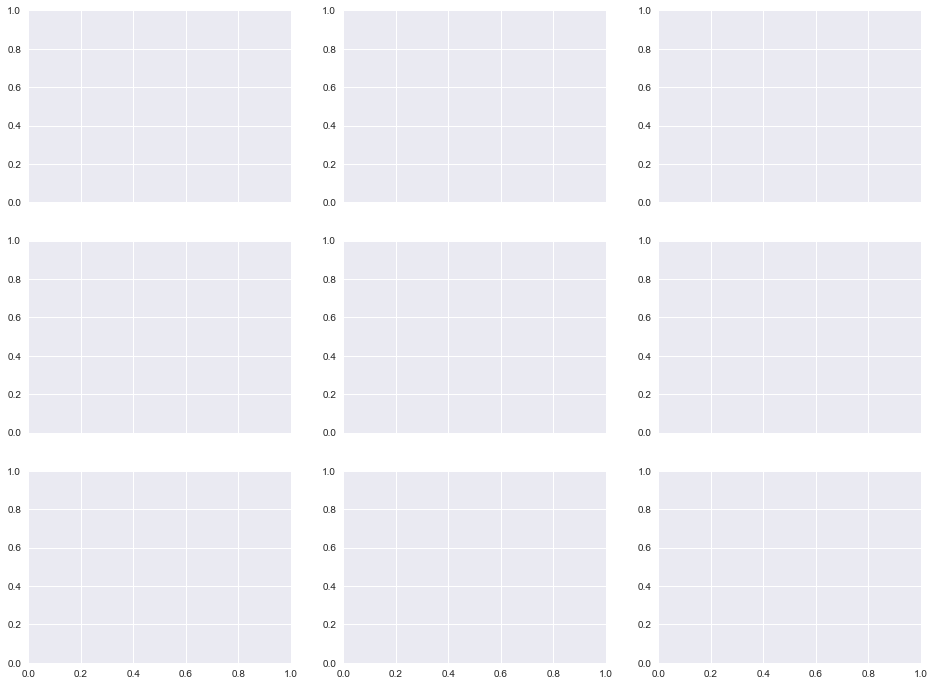

In [ ]:
for j in [0,1,2]:
    y_wind = df_proc[wind_column_energy[j]]
    y_solar = df_proc[solar_column_energy[j]]
    y_demand = df_proc[demand_column_energy[j]]
    y_wind_solar = y_solar + y_wind
    params_wind = {'color':wind_color,'ylim':(0,7500),'ylabel':energy_label,'xlabel':"Hour",'legend':"wind",'pos':(0,j)}
    params_solar = {'color':solar_color,'ylim':(0,7500),'ylabel':energy_label,'xlabel':"Month",'legend':"solar",'pos':(1,j)}
    params_demand = {'color':demand_color,'ylim':(0,10000),'ylabel':energy_label,'xlabel':"Month",'legend':"demand",'pos':(2,j)}
    params_wind_solar = {'color':wind_solar_color,'ylim':(0,10000),'ylabel':energy_label,'xlabel':"Month",'legend':"wind+solar",'pos':(2,j)}
    plot_median_quantiles(y_wind,y_wind.index.month, ax[0][j],params_wind)
    plot_median_quantiles(y_solar,y_solar.index.month,ax[1][j],params_solar)
    plot_median_quantiles(y_demand,y_demand.index.month,ax[2][j],params_demand)
    plot_median_quantiles(y_wind_solar,y_wind_solar.index.month,ax[2][j],params_wind_solar)

plt.savefig("monthly_distribution_wind_solar_demand.png")

Text(0.5, 0.98, 'Hourly distributions of wind speed and solar energy')

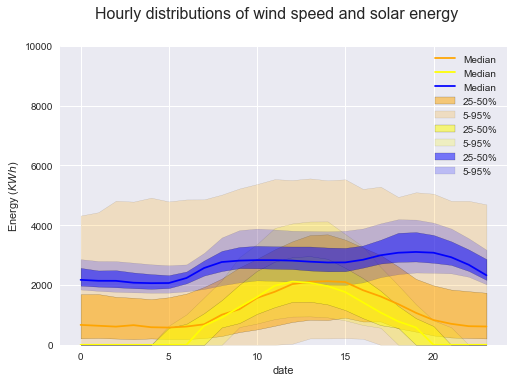

In [82]:
#create figure, and axes
mpl.style.use('seaborn')
fig,ax =  plt.subplots()


y_wind = df_proc[wind_column_energy[i]]
y_solar = df_proc[solar_column_energy[i]]
y_demand = df_proc[demand_column_energy[i]]
y_wind_solar = y_solar + y_wind
params_wind = {'color':wind_color,'ylim':(0,7500),'ylabel':energy_label}
params_solar = {'color':solar_color,'ylim':(0,7500),'ylabel':energy_label}
params_demand = {'color':demand_color,'ylim':(0,10000),'ylabel':energy_label}
params_wind_solar = {'color':wind_solar_color,'ylim':(0,10000),'ylabel':energy_label}
plot_median_quantiles(y_wind,y_wind.index.hour, ax,params_wind)
plot_median_quantiles(y_solar,y_solar.index.hour,ax,params_solar)
plot_median_quantiles(y_demand,y_demand.index.hour,ax,params_demand)
#plot_median_quantiles(y_wind_solar,y_wind_solar.index.hour,ax[2][i],params_wind_solar)

    
fig.suptitle('Hourly distributions of wind speed and solar energy', fontsize=16) 

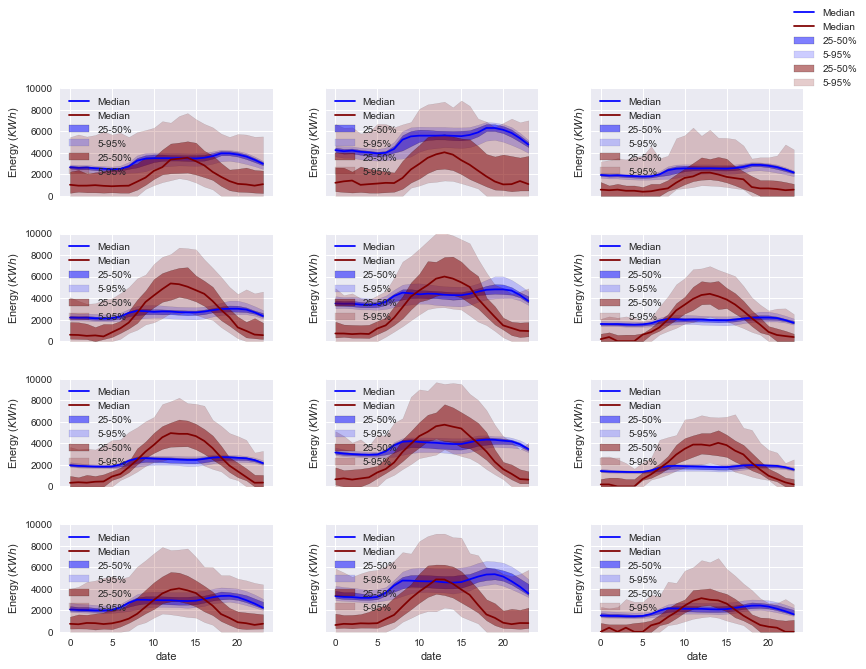

In [86]:
fig,ax =  plt.subplots(4,3,figsize=(12,10), sharey=True, sharex=True)
seasons = [summer, winter, autumn, spring]
for season in seasons:
    j = season['plot_pos']
    df_season = df_proc[season['period']]
    for i in [0,1,2]:
        y_wind = df_season[wind_column_energy[i]]
        y_solar = df_season[solar_column_energy[i]]
        y_demand = df_season[demand_column_energy[i]]
        y_wind_solar = y_solar + y_wind
        params_wind = {'color':wind_color,'ylim':(0,7500),'ylabel':energy_label}
        params_solar = {'color':solar_color,'ylim':(0,7500),'ylabel':energy_label}
        params_demand = {'color':demand_color,'ylim':(0,10000),'ylabel':energy_label}
        params_wind_solar = {'color':wind_solar_color,'ylim':(0,10000),'ylabel':energy_label}
        #plot_median_quantiles(y_wind,y_wind.index.hour, ax[0][i],params_wind)
        #plot_median_quantiles(y_solar,y_solar.index.hour,ax[1][i],params_solar)
        plot_median_quantiles(y_demand,y_demand.index.hour,ax[j][i],params_demand)
        plot_median_quantiles(y_wind_solar,y_wind_solar.index.hour,ax[j][i],params_wind_solar)
handles, labels = ax[0][0].get_legend_handles_labels()
plt.subplots_adjust(left=0.07, right=0.93, wspace=0.25, hspace=0.35)
fig.legend(handles, labels, loc='upper right')

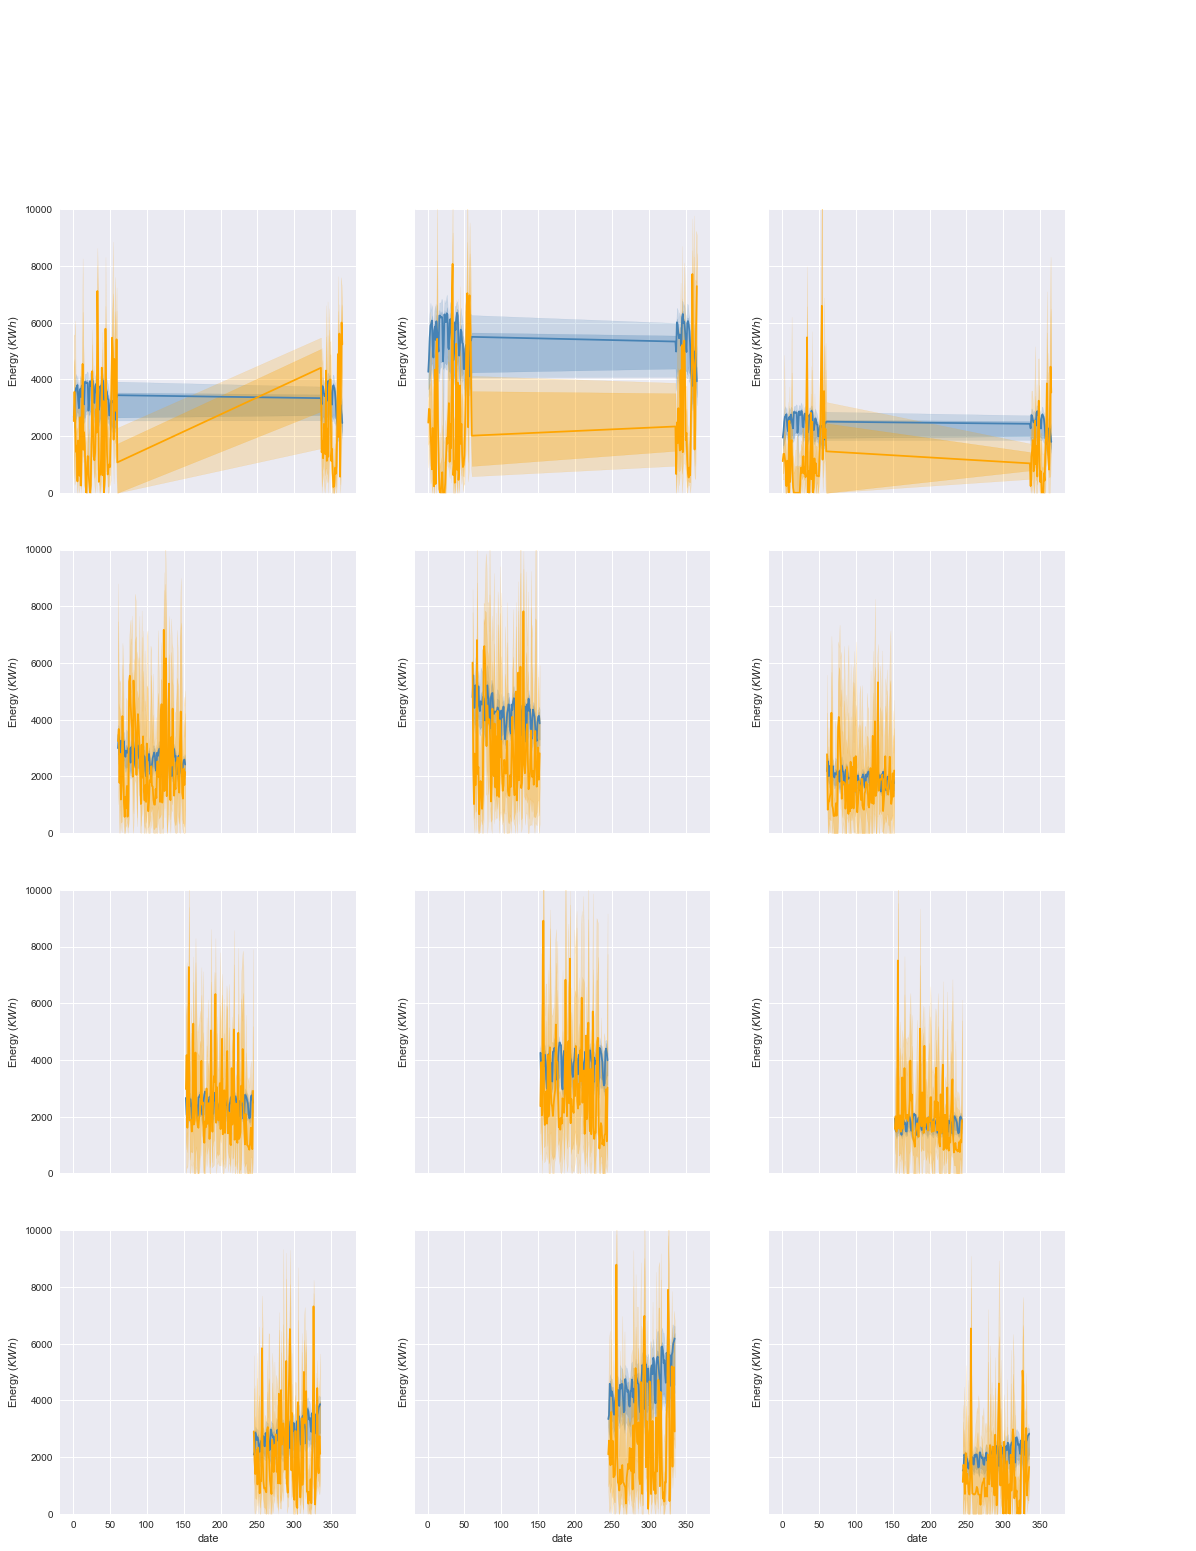

In [14]:
fig,ax =  plt.subplots(4,3,figsize=(18,24), sharey=True, sharex=True)
seasons = [summer, winter, autumn, spring]
for season in seasons:
    j = season['plot_pos']
    df_season = df_proc[season['period']]
    for i in [0,1,2]:
        y_wind = df_season[wind_column_energy[i]]
        y_solar = df_season[solar_column_energy[i]]
        y_demand = df_season[demand_column_energy[i]]
        y_wind_solar = y_solar + y_wind
        params_wind = {'color':wind_color,'ylim':(0,7500),'ylabel':energy_label}
        params_solar = {'color':solar_color,'ylim':(0,7500),'ylabel':energy_label}
        params_demand = {'color':demand_color,'ylim':(0,10000),'ylabel':energy_label}
        params_wind_solar = {'color':wind_solar_color,'ylim':(0,10000),'ylabel':energy_label}
        #plot_median_quantiles(y_wind,y_wind.index.hour, ax[0][i],params_wind)
        #plot_median_quantiles(y_solar,y_solar.index.hour,ax[1][i],params_solar)
        plot_median_quantiles(y_demand,y_demand.index.dayofyear,ax[j][i],params_demand)
        plot_median_quantiles(y_wind_solar,y_wind_solar.index.dayofyear,ax[j][i],params_wind_solar)
handles, labels = ax[j][2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

/var/folders/hg/bxlzgj9x4hq514dq6qy2kqkr0000gp/T/ipykernel_25959/951901139.py:14: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  plot_median_quantiles(y_wind,y_wind.index.weekofyear, ax[0][i],params_wind)
/var/folders/hg/bxlzgj9x4hq514dq6qy2kqkr0000gp/T/ipykernel_25959/951901139.py:15: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  plot_median_quantiles(y_solar,y_solar.index.weekofyear,ax[1][i],params_solar)
/var/folders/hg/bxlzgj9x4hq514dq6qy2kqkr0000gp/T/ipykernel_25959/951901139.py:16: FutureWarning: weekofyear and week have been deprecated, please use 

Text(0.5, 0.98, 'Hourly distributions of wind speed and solar energy')

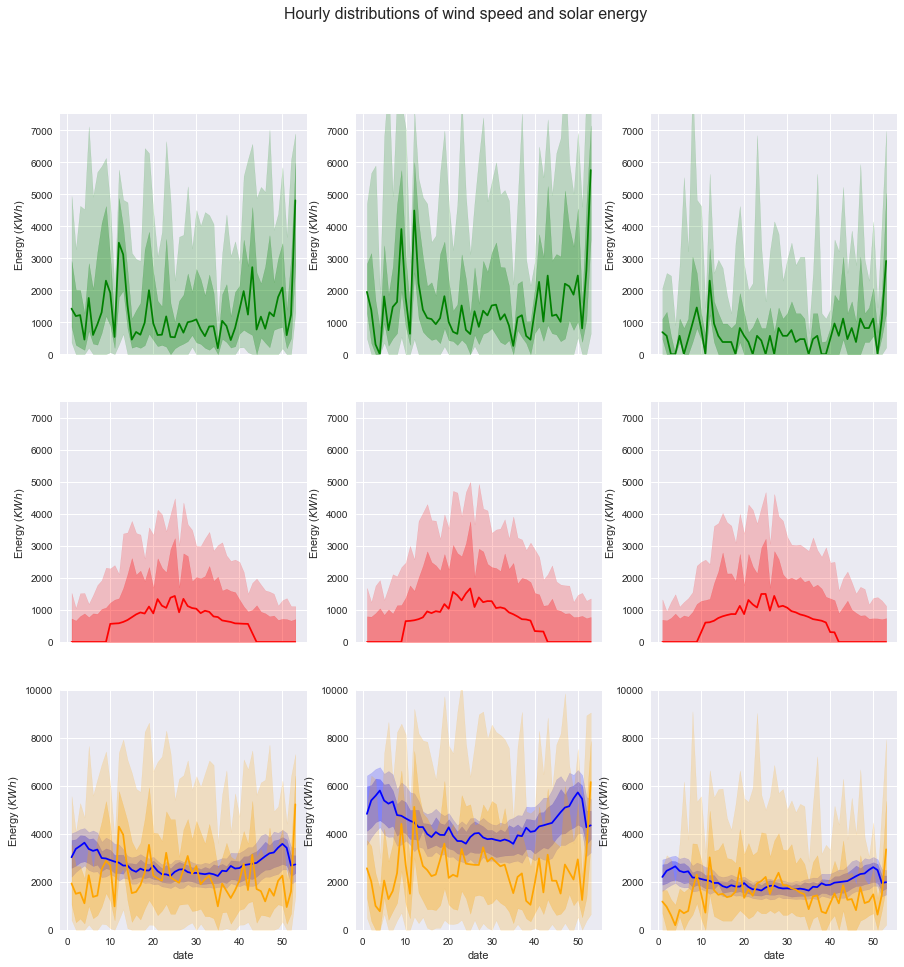

In [87]:
#create figure, and axes
mpl.style.use('seaborn')
fig,ax =  plt.subplots(3,3,figsize=(15,15), sharex=True)

for i in [0,1,2]:
    y_wind = df_proc[wind_column_energy[i]]
    y_solar = df_proc[solar_column_energy[i]]
    y_demand = df_proc[demand_column_energy[i]]
    y_wind_solar = y_solar + y_wind
    params_wind = {'color':wind_color,'ylim':(0,7500),'ylabel':energy_label}
    params_solar = {'color':solar_color,'ylim':(0,7500),'ylabel':energy_label}
    params_demand = {'color':demand_color,'ylim':(0,10000),'ylabel':energy_label}
    params_wind_solar = {'color':wind_solar_color,'ylim':(0,10000),'ylabel':energy_label}
    plot_median_quantiles(y_wind,y_wind.index.weekofyear, ax[0][i],params_wind)
    plot_median_quantiles(y_solar,y_solar.index.weekofyear,ax[1][i],params_solar)
    plot_median_quantiles(y_demand,y_demand.index.weekofyear,ax[2][i],params_demand)
    plot_median_quantiles(y_wind_solar,y_wind_solar.index.weekofyear,ax[2][i],params_wind_solar)

    
fig.suptitle('Hourly distributions of wind speed and solar energy', fontsize=16) 